# Load the objects

In [4]:
import functions
import pickle
import dataset

with open('objects/dataset.pkl','rb') as f: dataset = pickle.load(f)
with open('dataset/master_df.pkl','rb') as f: master_df = pickle.load(f)

## Dataset as dataframe

In [5]:
master_df.head()

,Name,Norm PC,Move,Status (eyeless),Pred-0 PC,Model-0
0,AA01_M1,"[[1.7564989224519107, 0.6253541802741319, 0.30...",1,clean,[],[]
1,ABD_M1,"[[1.5398565942838736, 0.5883973510699563, 0.26...",1,missing,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",p_ae_s-1
2,AC_M1,"[[-0.38237177668932, 0.4728121540702672, 0.552...",1,missing,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",p_ae_s-1
3,AD01_M1,"[[1.538563204067707, 0.4405452084387405, 0.478...",1,missing,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",p_ae_s-1
4,AF_M1,"[[0.5033656406761701, -1.0511009564520297, 0.3...",1,missing,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",p_ae_s-1


## These are the clean PCs

In [6]:
for id_ in master_df.index:
    if master_df["Status (eyeless)"][id_] == "clean":
        print(master_df["Name"][id_])

AA01_M1
CD01_M1
NL01_M1
RL01_M1
SD01_M1
AA01_M2
CD01_M2
NL01_M2
RL01_M2
NL01_M3
RL01_M3
SD01_M3
NL01_M4
RL01_M4
SD01_M4
TP01_M4
AA01_M5
JB01_M5
NL01_M5
RL01_M5
SD01_M5
TP01_M5


# Use this function to display and save (optional) the PC's visualization

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mask(norm_PC, t, name=[], save=False):
    PC = np.copy(norm_PC)
    PC = PC.reshape(500, 108, 3)
    PC = PC[:,3:-4, :]
    
    x = PC[t, :, 0]
    y = PC[t, :, 1]
    z = PC[t, :, 2]
    
    plt.figure(figsize = (16, 9));
    ax = plt.axes(projection ="3d");
    ax.set_box_aspect((1,1,1)); # include nan because the predicted points are inconsistent
    ax.view_init(0, 0);
    ax.scatter3D(x, y, z, color = 'red', marker ='^');
    plt.title(name);
    ax.set_xlabel('X', fontweight ='bold');
    ax.set_ylabel('Y', fontweight ='bold');
    ax.set_zlabel('Z', fontweight ='bold');
    if save:
        fname = "img/" + name + "{:03.0f}".format(t) + ".png"
        plt.savefig(fname);
        plt.close();

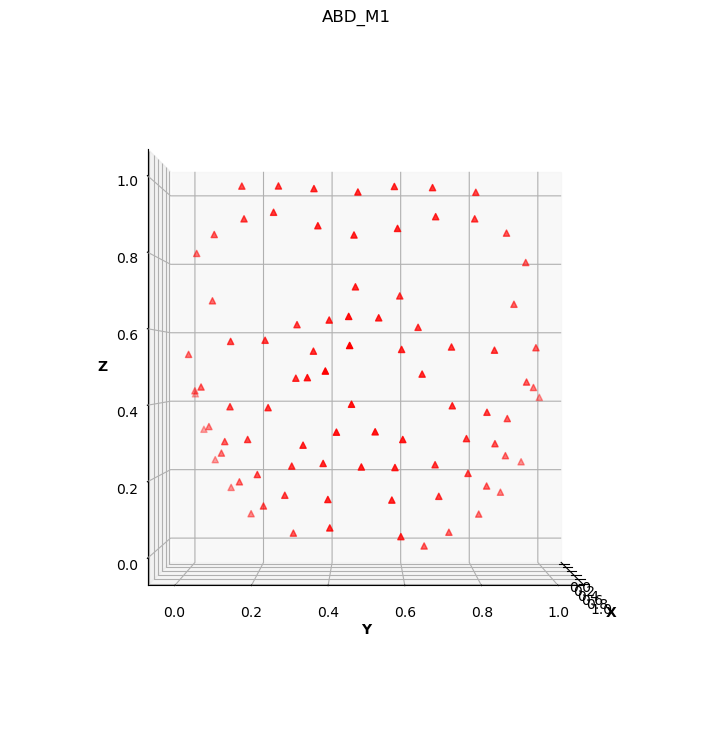

In [7]:
t = 0
id_ = 1
name = master_df["Name"][id_]
PC = np.copy(master_df["Norm PC"][id_])
plot_mask(PC, t, name, save=False)

# Explore point cloud (mask)

In [12]:
import pandas as pd

sample_df = pd.DataFrame(PC.reshape(500, -1, 3).tolist())
labels = dataset.masks[0].labels
sample_df.columns = labels
sample_df.head()

,M1,M2,M3,F1,F2,F3,F4,F5,F6,F7,...,Pln2,Pln3,Pln4,Pln5,N1,N2,Pps01,Lc2,Pps02,Lc5
0,"[1.5398565942838736, 0.5883973510699563, 0.262...","[1.430871580700337, 0.4472685059239156, 0.1056...","[1.5062479401959128, 0.3300994875711955, 0.273...","[0.5723999460910196, 0.15795441902041232, 0.99...","[0.6692898060313729, 0.2607261181640594, 0.993...","[0.7324578167842652, 0.35818159380029785, 0.98...","[0.7567638917860299, 0.47701326333725397, 0.97...","[0.7449723068187788, 0.5754308780504558, 0.988...","[0.7017587912766385, 0.6792752553774808, 0.987...","[0.6028661498599016, 0.7995384557922117, 0.979...",...,"[0.7395286515791796, 0.3568388441594026, 0.542...","[0.7100837763216968, 0.3088269858948712, 0.469...","[0.6951561725751115, 0.23324501602351627, 0.38...","[0.5964860624335282, 0.1746478781536498, 0.301...","[0.8457751155395813, 0.3421073971076773, 0.471...","[0.9883768869511563, 0.3917579424693693, 0.489...","[nan, nan, nan]","[nan, nan, nan]","[0.6704037487150906, 0.7895427688054003, 0.790...","[nan, nan, nan]"
1,"[1.5398196068116512, 0.5884379336752135, 0.263...","[1.430921501764903, 0.4472492723501664, 0.1056...","[1.506326821357068, 0.33016123960619836, 0.273...","[0.5728729915545515, 0.15773655058966266, 0.99...","[0.6686205543955533, 0.26095520969164304, 0.99...","[0.7322947417403374, 0.35834393328570424, 0.98...","[0.7567495531242519, 0.4770397946008867, 0.972...","[0.7449953950775341, 0.5754835321088485, 0.988...","[0.7017431400231182, 0.6792952066829435, 0.987...","[0.6024862665601964, 0.7998511895333597, 0.979...",...,"[0.7396383086419133, 0.3568401154661048, 0.542...","[0.7108067763826561, 0.3085658534089639, 0.469...","[0.6950944335758446, 0.2333122468728183, 0.389...","[0.5976757046824863, 0.17390526730684427, 0.30...","[0.8450373233454062, 0.34245783499582455, 0.47...","[0.9885285172602122, 0.39175137755507655, 0.48...","[nan, nan, nan]","[nan, nan, nan]","[0.6703117103525764, 0.7896066947417993, 0.790...","[nan, nan, nan]"
2,"[1.5398024325483568, 0.5884733882002445, 0.263...","[1.4309621058600401, 0.4472572323914375, 0.105...","[1.5063645708055131, 0.33022207549751365, 0.27...","[0.5728018462778776, 0.15777842981979465, 0.99...","[0.6682301486999749, 0.26112705005026204, 0.99...","[0.7322690353290074, 0.35842649786128866, 0.98...","[0.7566965122711441, 0.47708585788050334, 0.97...","[0.7450015969185245, 0.5755266903691831, 0.988...","[0.7017159001695149, 0.679355052273909, 0.9872...","[0.602196323734509, 0.7999660165557012, 0.9794...",...,"[0.7396429229360781, 0.3568663014635762, 0.542...","[0.7109696494669703, 0.30849889884965115, 0.46...","[0.6950858044435584, 0.23335130398268564, 0.38...","[0.5984572471898217, 0.17343348929299068, 0.30...","[0.8451396844953403, 0.34241229370184434, 0.47...","[0.9885619762879987, 0.3917666029148487, 0.489...","[nan, nan, nan]","[nan, nan, nan]","[0.6702561020987262, 0.7896473786219145, 0.790...","[nan, nan, nan]"
3,"[1.539801453420733, 0.5885047417964829, 0.2631...","[1.4309946437442695, 0.44728346389690493, 0.10...","[1.5063780689497275, 0.3302775145391214, 0.273...","[0.5723966320080652, 0.1579824470165733, 0.997...","[0.6680452897716218, 0.26124868231662324, 0.99...","[0.7323305122460698, 0.35845100136834945, 0.98...","[0.7566335148863663, 0.4771413164324422, 0.972...","[0.7449910468585735, 0.5755627214859453, 0.988...","[0.7016750353243881, 0.6794360317772069, 0.987...","[0.6019862668201206, 0.7999522227121721, 0.979...",...,"[0.7395801947891282, 0.35690712005961484, 0.54...","[0.7107527167578893, 0.30856879538687565, 0.46...","[0.6951163534725232, 0.23337092857678352, 0.38...","[0.5989140167316128, 0.1731776271326646, 0.301...","[0.8456560727564393, 0.34217963169813964, 0.47...","[0.9884845749530042, 0.39180910284678183, 0.48...","[nan, nan, nan]","[nan, nan, nan]","[0.6702269439823523, 0.7896735095445456, 0.790...","[nan, nan, nan]"
4,"[1.539813051355522, 0.5885330216153617, 0.2631...","[1.431020366176113, 0.4473190447157449, 0.1057...","[1.5063841961981905, 0.3303230760250

# Use these commands to create GIFs

In [28]:
#%matplotlib notebook
from PIL import Image
import glob

id_ = 1

if master_df["Status (eyeless)"][id_] == 'clean':
    PC = master_df["Norm PC"][id_]
else:    
    PC = master_df["Pred-0 PC"][id_]

name = master_df["Name"][id_]
for t in range(500):
    plot_mask(PC, t, name, save=True);
    
# Create the frames
frames = []
fname = "img/" + name + "*.png"
imgs = glob.glob(fname)
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
gname = "gif/" + name + ".gif"
frames[0].save(gname, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=50, loop=0)